Cargando librerías

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Cargando datos

In [291]:
marg_index <- read_csv('Base_Indice_de_marginacion_municipal.csv')

months <- c('January','February','March','April','May','June','July','August','September','October','November','December')

delitos1 <- readRDS('datos_delitos.rds') %>%
    mutate(categoria_delito = factor(categoria_delito),
           alcaldia_hechos = factor(alcaldia_hechos),
           año = factor(format(fecha_hechos,'%Y')),
           mes = factor(format(fecha_hechos,'%B'), level = months),
           CVE_MUN = case_when(
               alcaldia_hechos == 'ALVARO OBREGON' ~ 9010,
               alcaldia_hechos == 'AZCAPOTZALCO' ~ 9002,
               alcaldia_hechos == 'BENITO JUAREZ' ~ 9014,
               alcaldia_hechos == 'COYOACAN' ~ 9003,
               alcaldia_hechos == 'CUAJIMALPA DE MORELOS' ~ 9004,
               alcaldia_hechos == 'CUAUHTEMOC' ~ 9015,
               alcaldia_hechos == 'GUSTAVO A MADERO' ~ 9005,
               alcaldia_hechos == 'IZTACALCO' ~ 9006,
               alcaldia_hechos == 'IZTAPALAPA' ~ 9007,
               alcaldia_hechos == 'LA MAGDALENA CONTRERAS' ~ 9008,
               alcaldia_hechos == 'MIGUEL HIDALGO' ~ 9016,
               alcaldia_hechos == 'MILPA ALTA' ~ 9009,
               alcaldia_hechos == 'TLAHUAC' ~ 9011,
               alcaldia_hechos == 'TLALPAN' ~ 9012,
               alcaldia_hechos == 'VENUSTIANO CARRANZA' ~ 9017,
               alcaldia_hechos == 'XOCHIMILCO' ~ 9013)) %>%
    select(CVE_MUN, año, mes, alcaldia_hechos,categoria_delito)

delitos2 <- delitos1 %>%
    group_by(CVE_MUN, año, mes) %>%
    tally(sort = TRUE)

delitos3 <- delitos1 %>%
    group_by(año, mes,categoria_delito) %>%
    tally(sort = TRUE)

delitos4 <- delitos1 %>%
    group_by(año, mes) %>%
    tally(sort = TRUE)

gp1 <- delitos1 %>%
    ggplot()

gp2 <- delitos2 %>%
    ggplot()

Parsed with column specification:
cols(
  CVE_ENT = col_double(),
  ENT = col_character(),
  CVE_MUN = col_double(),
  MUN = col_character(),
  POB_TOT = col_double(),
  ANALF = col_double(),
  SPRIM = col_double(),
  OVSDE = col_double(),
  OVSEE = col_double(),
  OVSAE = col_double(),
  VHAC = col_double(),
  OVPT = col_double(),
  `PL<5000` = col_double(),
  PO2SM = col_double(),
  IM = col_double(),
  GM = col_character()
)



In [292]:
with(delitos2,
     sapply(split(n,CVE_MUN),
            summary)) %>%
    t() %>%
    round(digits = 2) %>%
    as.data.frame() %>%
    rownames_to_column(var = 'CVE_MUN') %>%
    mutate(CVE_MUN = as.integer(CVE_MUN)) %>%
    inner_join(marg_index, by = 'CVE_MUN')

CVE_MUN,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,CVE_ENT,ENT,MUN,⋯,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL<5000,PO2SM,IM,GM
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
9002,674,880.50,920.0,926.27,990.00,1069,9,Distrito Federal,Azcapotzalco,⋯,6.41,0.00,0.00,0.21,16.56,0.29,0.00,25.97,-1.871,Muy bajo
9003,994,1175.75,1278.5,1261.17,1357.00,1491,9,Distrito Federal,Coyoac<87>n,⋯,4.81,0.00,0.01,0.07,12.04,0.16,0.00,24.46,-1.994,Muy bajo
9004,207,247.25,265.5,265.47,279.25,330,9,Distrito Federal,Cuajimalpa de Morelos,⋯,7.05,0.13,0.14,0.65,19.33,0.79,1.54,22.17,-1.822,Muy bajo
9005,1452,1828.50,1919.5,1884.73,2006.00,2130,9,Distrito Federal,Gustavo A. Madero,⋯,7.25,0.06,0.05,0.35,21.12,0.25,0.00,31.03,-1.728,Muy bajo
9006,646,763.25,840.0,834.40,907.75,1027,9,Distrito Federal,Iztacalco,⋯,5.26,0.05,0.00,0.07,17.10,0.15,0.00,27.26,-1.885,Muy bajo
9007,2257,2641.50,2794.5,2779.97,2920.50,3088,9,Distrito Federal,Iztapalapa,⋯,8.10,0.02,0.06,0.86,24.07,0.57,0.00,34.04,-1.627,Muy bajo
9008,221,253.50,281.5,280.87,310.75,358,9,Distrito Federal,La Magdalena Contreras,⋯,8.40,0.05,0.02,0.80,24.61,1.08,0.27,28.51,-1.657,Muy bajo
9009,81,109.25,120.5,124.00,138.00,173,9,Distrito Federal,Milpa Alta,⋯,10.48,0.26,0.35,12.79,35.68,1.99,21.61,44.85,-1.029,Bajo
9010,1031,1167.50,1276.5,1255.67,1351.25,1472,9,Distrito Federal,<e7>lvaro Obreg<97>n,⋯,7.51,0.03,0.01,0.53,20.47,0.28,0.05,26.52,-1.779,Muy bajo


In [293]:
with(delitos3,
     sapply(split(n,categoria_delito),
            summary)) %>%
    t() %>%
    round(digits = 2)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
DELITO DE BAJO IMPACTO,11564,13906.75,14683.0,14803.73,16257.00,17633
HECHO NO DELICTIVO,236,555.00,1288.0,1060.33,1445.25,1651
HOMICIDIO DOLOSO,62,81.00,94.5,95.80,107.50,147
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,48,71.00,78.5,77.37,86.75,105
ROBO A CASA HABITACIÓN CON VIOLENCIA,28,34.25,39.0,43.93,49.75,76
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,11,24.50,30.5,33.50,39.75,61
ROBO A NEGOCIO CON VIOLENCIA,147,216.50,251.5,291.60,347.00,590
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,43,54.25,59.5,67.20,78.50,121
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,5,12.25,15.5,17.53,19.75,48
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,51,73.25,115.5,152.67,225.50,374


In [294]:
with(delitos4,
     sapply(split(n,año),
            summary)) %>%
    t() %>%
    round(digits = 2)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
2017,15643,17470.25,18253.0,18002.33,18660.00,19882
2018,18391,19445.50,19948.5,19904.50,20278.75,21620
2019,15045,15947.00,18339.0,17651.83,18847.00,20022


In [296]:
with(delitos4,
     sapply(split(n,mes),
            summary)) %>%
    t() %>%
    round(digits = 2)

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
January,15045,15821.50,16598.0,16678.00,17494.50,18391
February,15643,17125.00,18607.0,17636.00,18632.50,18658
March,17761,18891.50,20022.0,19312.67,20088.50,20155
April,16448,17259.50,18071.0,18109.00,18939.50,19808
May,18897,18912.00,18927.0,19690.67,20087.50,21248
June,15239,16890.50,18542.0,17876.00,19194.50,19847
July,18402,18818.25,19234.5,19234.50,19650.75,20067
August,19226,19582.00,19938.0,19938.00,20294.00,20650
September,18104,18505.00,18906.0,18906.00,19307.00,19708
October,19882,20316.50,20751.0,20751.00,21185.50,21620


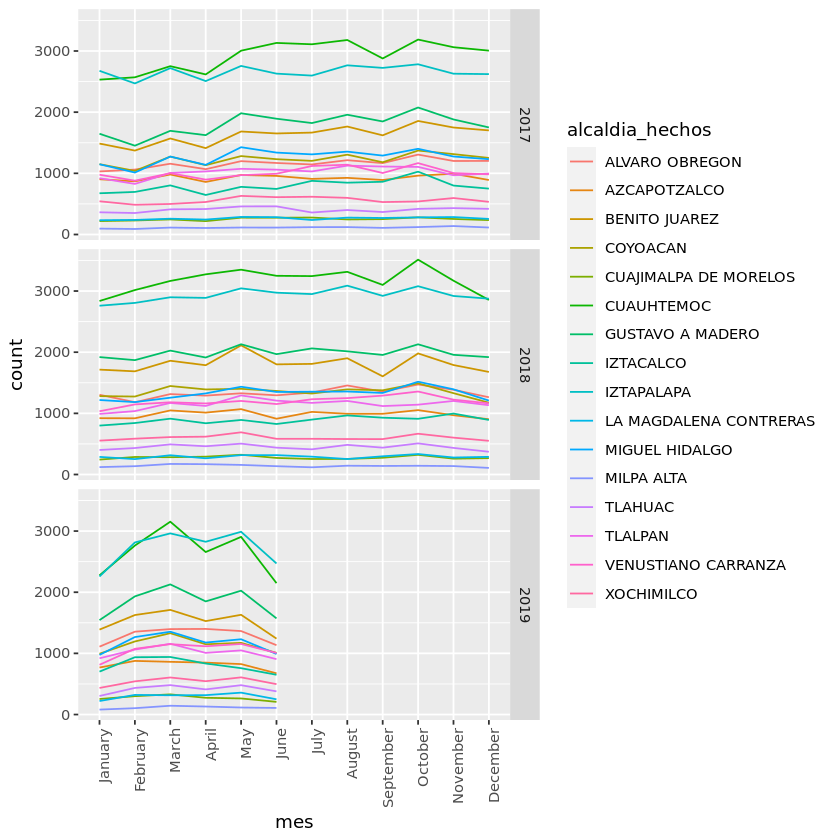

In [297]:
gp1 +
    geom_line(aes(x = mes, group = alcaldia_hechos, color = alcaldia_hechos),stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_grid(rows = vars(año))

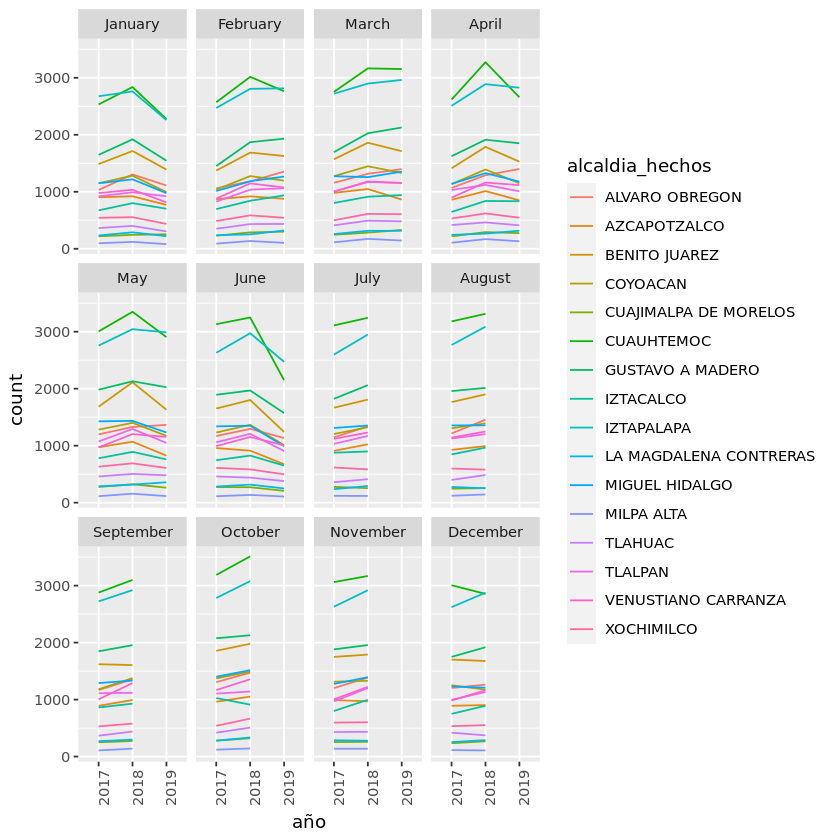

In [298]:
gp1 +
    geom_line(aes(x = año, group = alcaldia_hechos, color = alcaldia_hechos),stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_wrap(vars(mes))

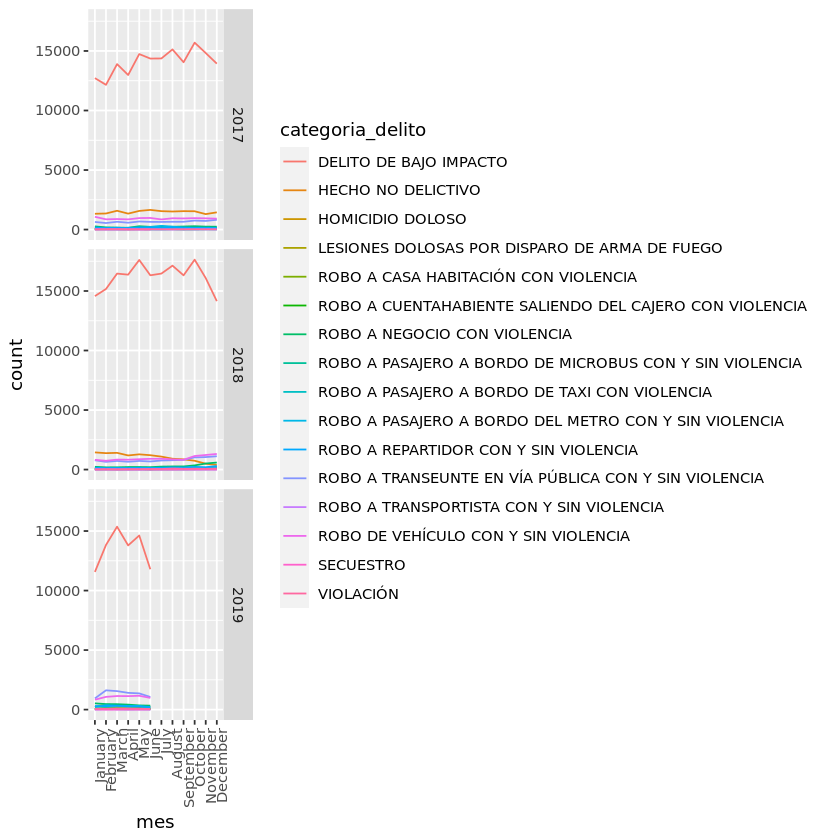

In [162]:
gp1 +
    geom_line(aes(x = mes, group = categoria_delito, color = categoria_delito),stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_grid(rows = vars(año))

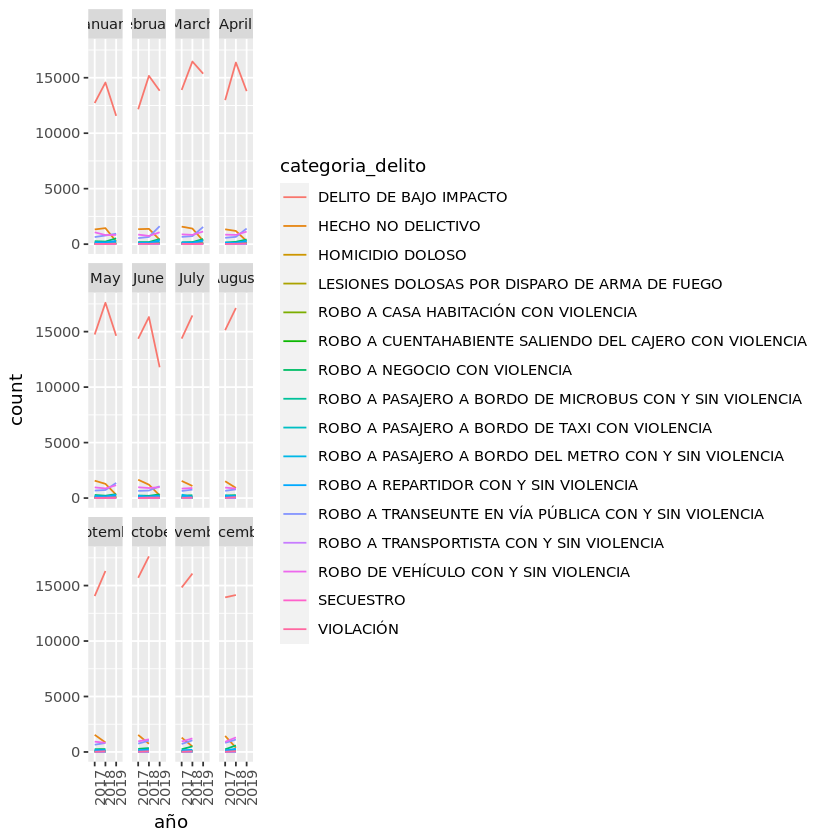

In [163]:
gp1 +
    geom_line(aes(x = año, group = categoria_delito, color = categoria_delito),stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_wrap(vars(mes))

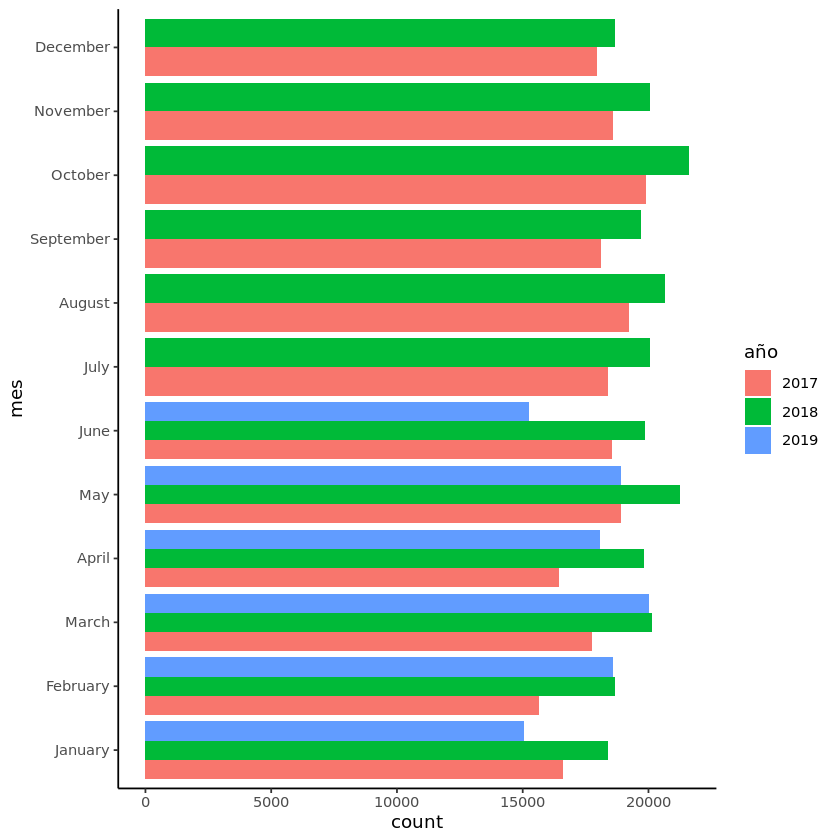

In [144]:
gp1 +
    geom_bar(aes(mes, fill = año), position = 'dodge') +
    coord_flip() +
    theme_classic()

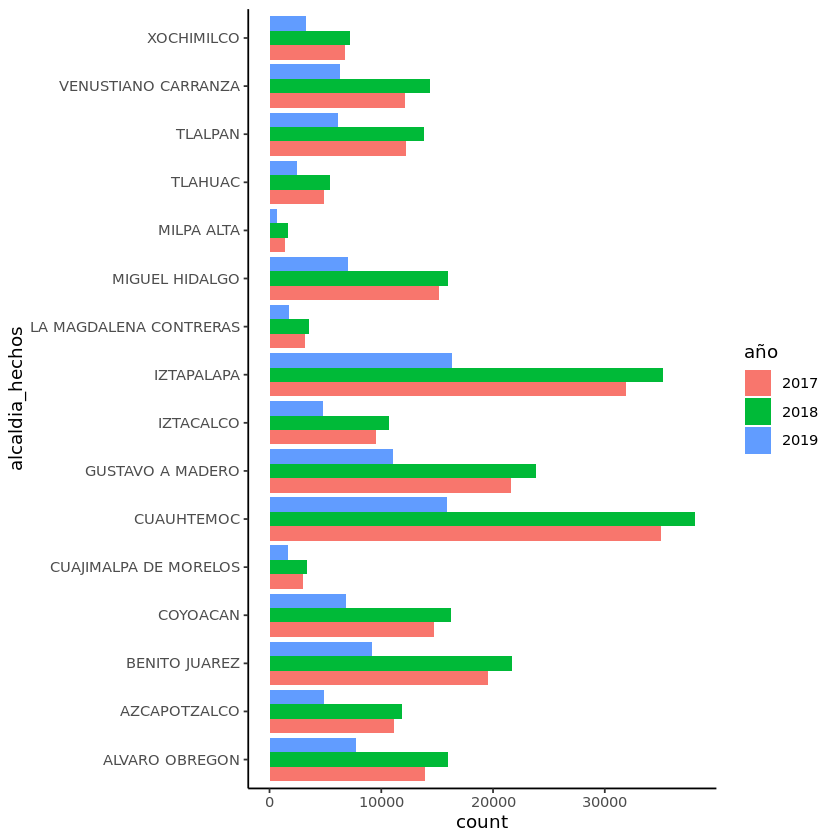

In [156]:
gp1 +
    geom_bar(aes(alcaldia_hechos, fill = año), position = 'dodge') +
    coord_flip() +
    theme_classic()

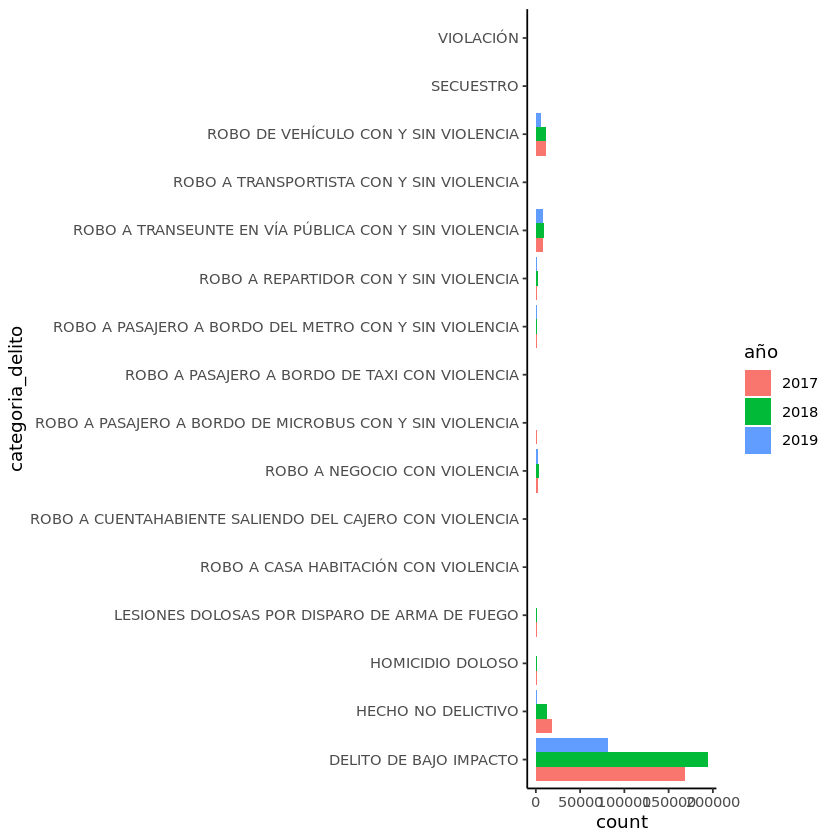

In [157]:
gp1 +
    geom_bar(aes(categoria_delito, fill = año), position = 'dodge') +
    coord_flip() +
    theme_classic()

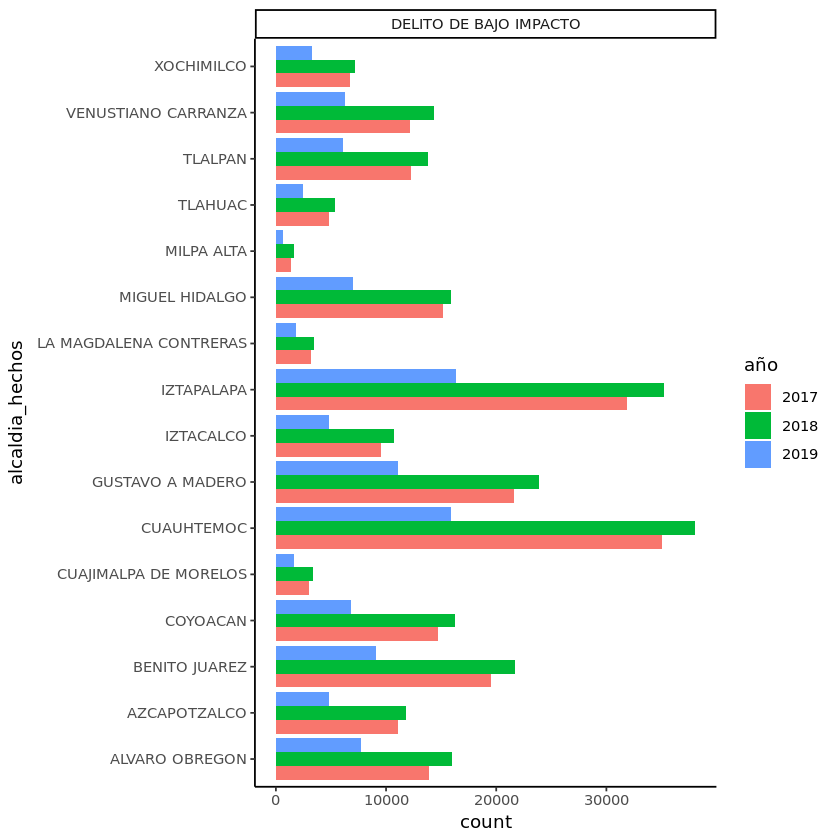

In [211]:
gp1 +
    geom_bar(aes(alcaldia_hechos, fill = año), position = 'dodge') +
    coord_flip() +
    theme_classic() +
    facet_wrap(vars(categoria_delito[16]))

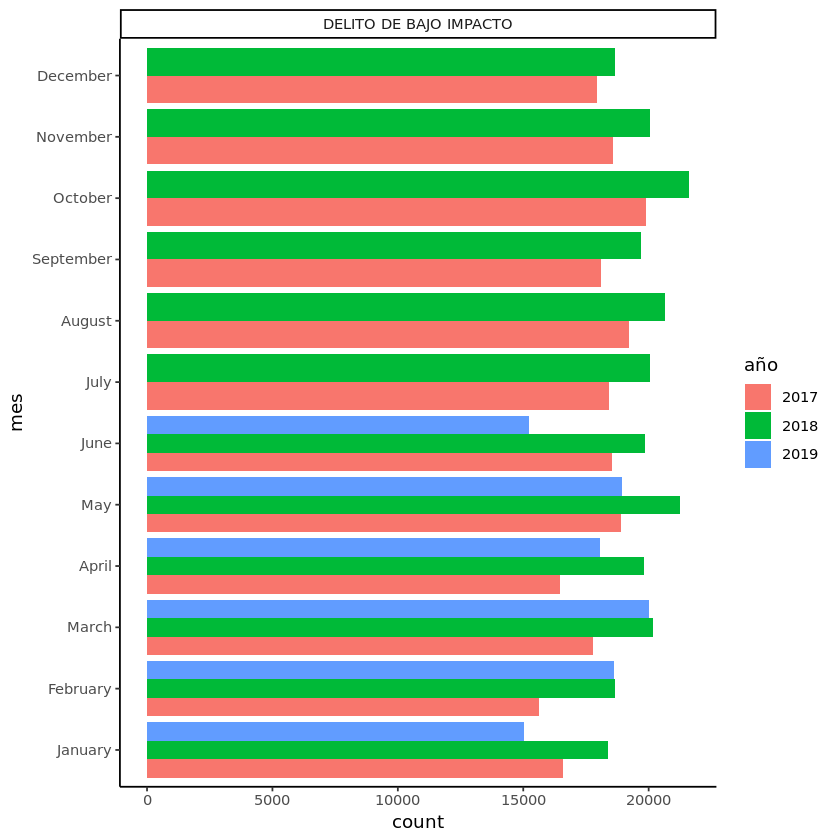

In [212]:
gp1 +
    geom_bar(aes(mes, fill = año), position = 'dodge') +
    coord_flip() +
    theme_classic() +
    facet_wrap(vars(categoria_delito[16]))

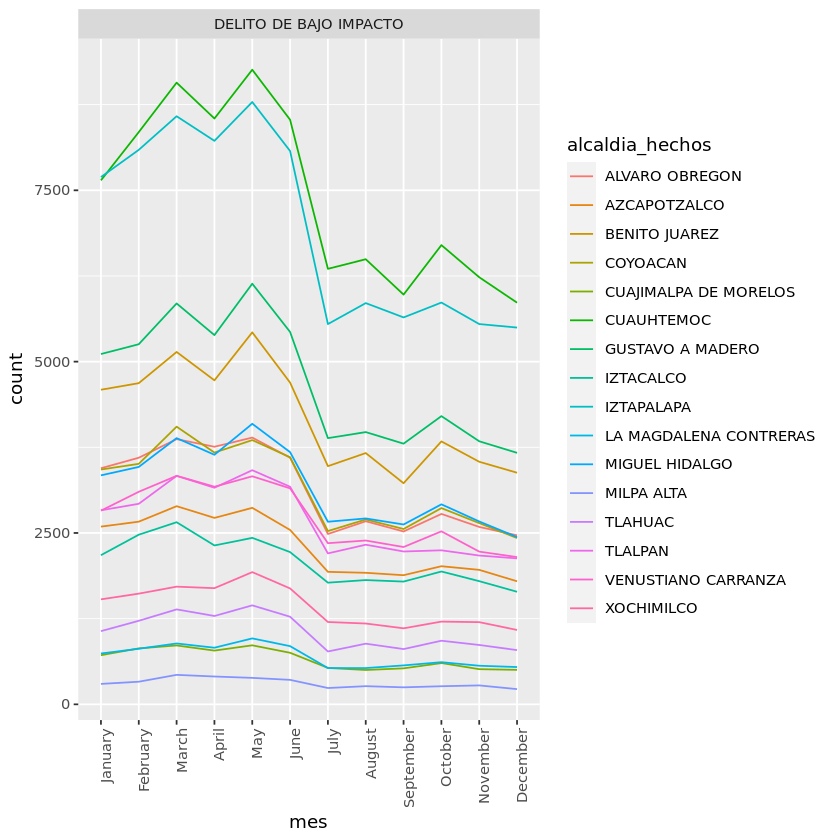

In [203]:
gp1 +
    geom_line(aes(x = mes, group = alcaldia_hechos, color = alcaldia_hechos), stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_wrap(vars(categoria_delito[16]))

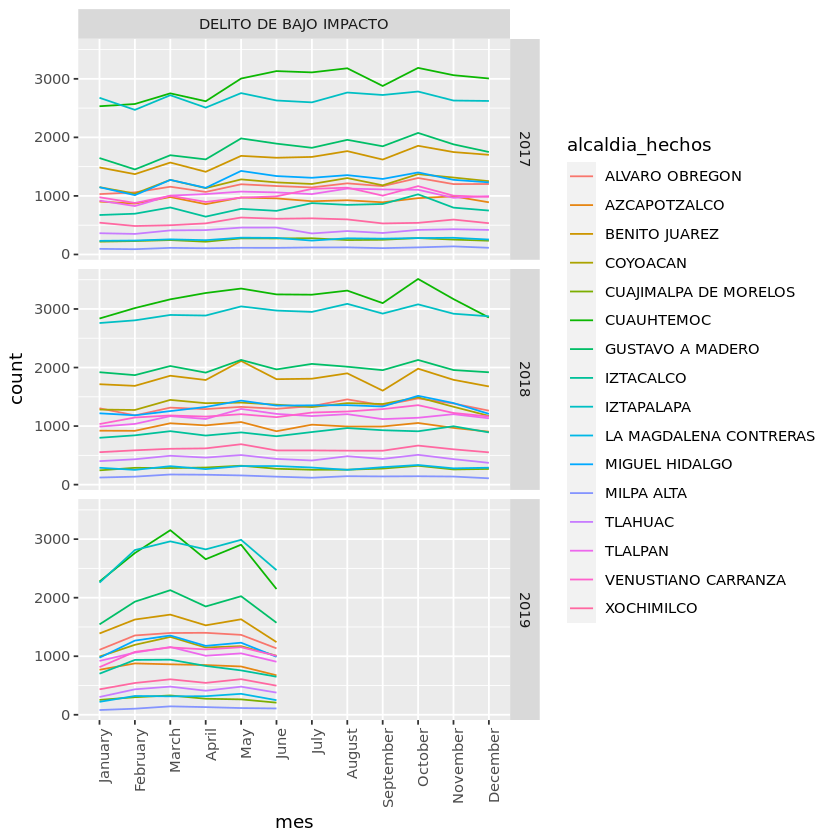

In [206]:
gp1 +
    geom_line(aes(x = mes, group = alcaldia_hechos, color = alcaldia_hechos), stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_grid(rows = vars(año), cols = vars(categoria_delito[16]))